<a href="https://colab.research.google.com/github/e40125/LSTM118b/blob/main/COGS_118B_Final_Project_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib scikit-learn tensorflow -qqq

In [ ]:
pip install yfinance -qqq

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
import yfinance as yf

spy = yf.download('SPY', start='2007-01-01', end='2021-12-08')

[*********************100%***********************]  1 of 1 completed


In [ ]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,142.250000,142.860001,140.570007,141.369995,100.900597,94807600
2007-01-04,141.229996,142.050003,140.610001,141.669998,101.114754,69620600
2007-01-05,141.330002,141.399994,140.380005,140.539993,100.308235,76645300
2007-01-08,140.820007,141.410004,140.250000,141.190002,100.772125,71655000
2007-01-09,141.309998,141.600006,140.399994,141.070007,100.686470,75680100


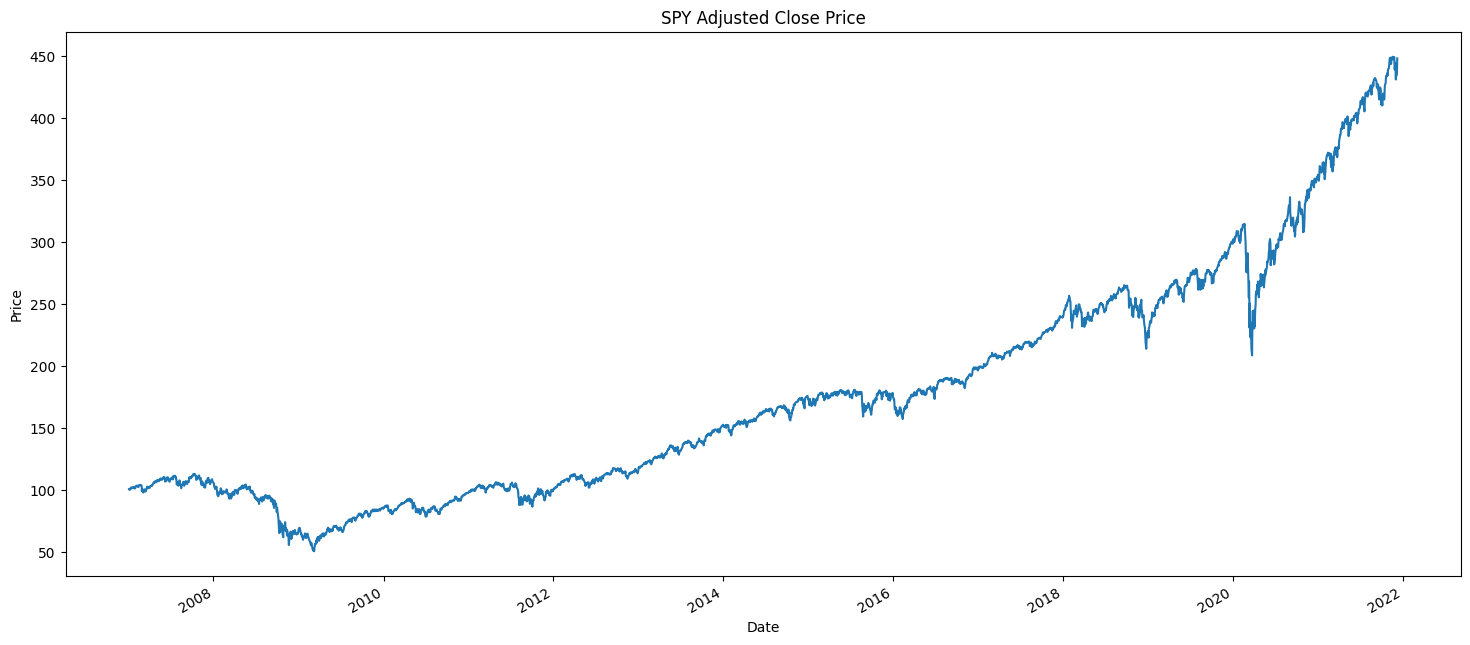

In [ ]:
spy['Adj Close'].plot(figsize=(18,8))
plt.title("SPY Adjusted Close Price")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

In [ ]:
spy_price = np.array(spy.get('Adj Close'))
spy_price = spy_price.reshape(-1,1)

In [ ]:
scaler= MinMaxScaler()
data_scaled=scaler.fit_transform(spy_price)
spy = spy.assign(Scaled=data_scaled)

In [ ]:
print(spy)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2007-01-03  142.250000  142.860001  140.570007  141.369995  100.900597   
2007-01-04  141.229996  142.050003  140.610001  141.669998  101.114754   
2007-01-05  141.330002  141.399994  140.380005  140.539993  100.308235   
2007-01-08  140.820007  141.410004  140.250000  141.190002  100.772125   
2007-01-09  141.309998  141.600006  140.399994  141.070007  100.686470   
...                ...         ...         ...         ...         ...   
2021-12-01  461.640015  464.670013  450.290009  450.500000  431.077484   
2021-12-02  450.730011  459.070007  450.309998  457.399994  437.680023   
2021-12-03  459.170013  460.299988  448.920013  453.420013  433.871613   
2021-12-06  456.130005  460.790009  453.559998  458.790009  439.010071   
2021-12-07  464.410004  468.880005  458.649994  468.279999  448.090942   

               Volume    Scaled  
Dat

In [ ]:
train_data= spy[:2500] #first 2500 days as test data
test_data= spy[2500:] #rest as test data

In [ ]:
train_data

,Open,High,Low,Close,Adj Close,Volume,Scaled
Date,,,,,,,
2007-01-03,142.250000,142.860001,140.570007,141.369995,100.900597,94807600,0.125883
2007-01-04,141.229996,142.050003,140.610001,141.669998,101.114754,69620600,0.126420
2007-01-05,141.330002,141.399994,140.380005,140.539993,100.308235,76645300,0.124398
2007-01-08,140.820007,141.410004,140.250000,141.190002,100.772125,71655000,0.125561
2007-01-09,141.309998,141.600006,140.399994,141.070007,100.686470,75680100,0.125346
...,...,...,...,...,...,...,...
2016-11-29,220.520004,221.440002,220.169998,220.910004,193.009827,69886700,0.356863
2016-11-30,221.630005,221.820007,220.309998,220.380005,192.546753,113291800,0.355701
2016-12-01,220.729996,220.729996,219.149994,219.570007,191.839035,79040500,0.353927


In [ ]:
training_data=np.array(train_data['Scaled'])  #normalized train data

In [ ]:
testing_data= np.array(test_data.get('Scaled')) #normalized test data

In [ ]:
training_data.shape

(2500,)

In [ ]:
testing_data.shape

(1260,)

In [ ]:
training_data =training_data.reshape(-1,1)
print(training_data.shape)

(2500, 1)


In [ ]:
testing_data =testing_data.reshape(-1,1)
print(testing_data.shape)

(1260, 1)


In [ ]:
X_train = []
y_train = []
for i in range(60, 2500):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
print(X_train.shape)

(2440, 60, 1)


In [ ]:
# model=Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 50s 257ms/step - loss: 0.0068
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - loss: 5.6040e-04
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - loss: 4.5032e-04
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 4.6768e-04
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 3.9512e-04
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 3.6284e-04
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 3.3055e-04
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 3.4980e-04
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 4.0176e-04
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - loss: 2.6398e-04
Epoch 11/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 2.9954e-04
Epoch 12/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 2.6737e-04
Epoch 13/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 2.3739e-04
Epoch 14/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - lo

In [ ]:
spy.iloc[:2500,4]
test_inputs = spy.iloc[2500-60:,4].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs.shape

(1320, 1)

In [ ]:
X_test = []
y_test = []

# Test Data
test_inputs = spy.iloc[2500-60:,4].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.fit_transform(test_inputs)


for i in range(60, len(test_inputs)):
    X_test.append(test_inputs[i-60:i, 0])
    y_test.append(test_inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1260, 60, 1)


In [ ]:
predictions = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


In [ ]:
print(X_test.shape)
print(y_test.shape)
print(predictions.shape)

(1260, 60, 1)
(1260,)
(1260, 1)


In [ ]:
predictions_unscaled = scaler.inverse_transform(predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# calculate error
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error: 21.979673420942785
Mean Absolute Error: 12.349134511796255


In [ ]:
predictions_unscaled[0:].shape

(1260, 1)

In [ ]:
predictions_unscaled[:,0]

array([193.41959, 193.56586, 194.15396, ..., 371.8067 , 371.26447,
       371.04727], dtype=float32)

In [ ]:
test_df = pd.DataFrame({
    'Actual Price': spy.iloc[2500:,4].values,
    'Predicted Price': predictions_unscaled[:,0]
}, index=spy.index[-1260:])

In [ ]:
test_df

,Actual Price,Predicted Price
Date,,
2016-12-06,193.700027,193.419586
2016-12-07,196.233780,193.565857
2016-12-08,196.714325,194.153961
2016-12-09,197.902527,195.060852
2016-12-12,197.675385,196.138184
...,...,...
2021-12-01,431.077484,373.299774
2021-12-02,437.680023,372.523407
2021-12-03,433.871613,371.806702


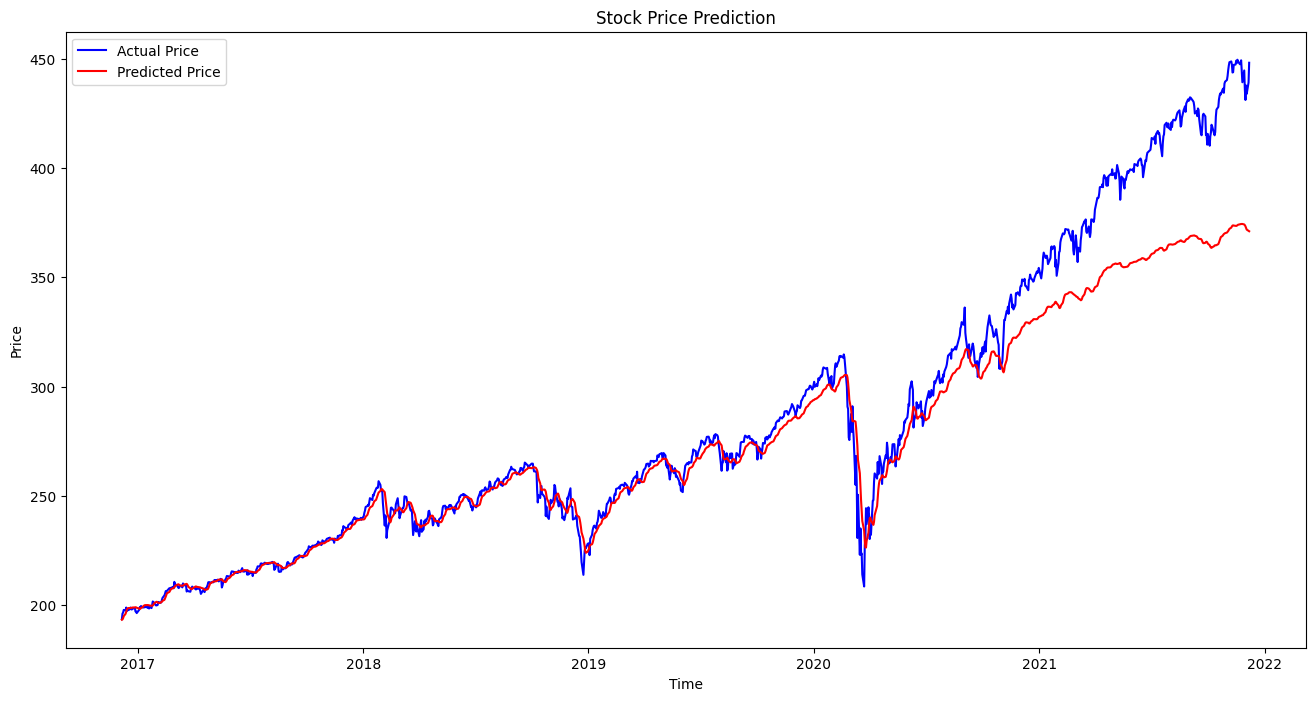

In [ ]:
plt.figure(figsize=(16,8))
# test_df.get(['Actual Price','Predicted Price']).plot(kind='line',figsize=(18,8))
plt.plot(test_df['Actual Price'], color='blue', label='Actual Price')
plt.plot(test_df['Predicted Price'], color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# last 60 days of data
last_60_days = spy.iloc[-60:]['Scaled'].values
last_60_days = last_60_days.reshape(-1, 1)

# reshape
X_next_day = np.array([last_60_days])
X_next_day = np.reshape(X_next_day, (X_next_day.shape[0], X_next_day.shape[1], 1))

# make prediction
next_day_scaled = model.predict(X_next_day)

# unscale prediction
next_day_price = scaler.inverse_transform(next_day_scaled)

print(f"Predicted closing price for Dec 8, 2021: ${next_day_price[0][0]:.2f}")

# actual price for 12/08/2021
actual_price = yf.download('SPY', start='2021-12-08', end='2021-12-09')['Adj Close'][0]
print(f"Actual closing price for Dec 8, 2021: ${actual_price:.2f}")

# calculate difference
diff = actual_price - next_day_price[0][0]
print(f"Difference: ${diff:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


[*********************100%***********************]  1 of 1 completed

Predicted closing price for Dec 8, 2021: $372.54
Actual closing price for Dec 8, 2021: $449.28
Difference: $76.74



<ipython-input-31-b4d7caf467ac>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  actual_price = yf.download('SPY', start='2021-12-08', end='2021-12-09')['Adj Close'][0]


# **Trained on all data**

In [ ]:
all_data = spy['Adj Close'].values.reshape(-1,1)
scaled_data = scaler.fit_transform(all_data)

X_all = []
y_all = []
for i in range(60, len(scaled_data)):
    X_all.append(scaled_data[i-60:i, 0])
    y_all.append(scaled_data[i, 0])
X_all, y_all = np.array(X_all), np.array(y_all)
X_all = np.reshape(X_all, (X_all.shape[0], X_all.shape[1], 1))

model.fit(X_all, y_all, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - loss: 0.0017
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - loss: 6.4348e-04
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - loss: 5.9483e-04
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - loss: 6.5072e-04
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - loss: 6.2125e-04
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - loss: 5.6366e-04
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - loss: 7.2601e-04
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - loss: 5.6152e-04
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - loss: 6.0007e-04
Epoch 10/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - loss: 6.2636e-04
Epoch 11/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - loss: 4.8372e-04
Epoch 12/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 110ms/step - loss: 5.9124e-04
Epoch 13/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - loss: 4.9728e-04
Epoch 14/100
116/116 ━━━━

In [ ]:
# last 60 days
last_60_days = scaled_data[-60:]
X_predict = np.array([last_60_days])
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

# predict
next_day_scaled = model.predict(X_predict)
next_day_price = scaler.inverse_transform(next_day_scaled)

print(f"Predicted closing price for Dec 8, 2021: ${next_day_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted closing price for Dec 8, 2021: $427.80


In [ ]:
# actual price data for the day
actual_price = yf.download('SPY', start='2021-12-08', end='2021-12-09')['Adj Close'][0]
print(f"Actual closing price for Dec 8, 2021: ${actual_price:.2f}")

[*********************100%***********************]  1 of 1 completed

Actual closing price for Dec 8, 2021: $449.28



<ipython-input-34-646ea963f0de>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  actual_price = yf.download('SPY', start='2021-12-08', end='2021-12-09')['Adj Close'][0]


In [ ]:
# calculate difference
diff = actual_price - next_day_price[0][0]
print(f"Difference: ${diff:.2f}")

Difference: $21.48


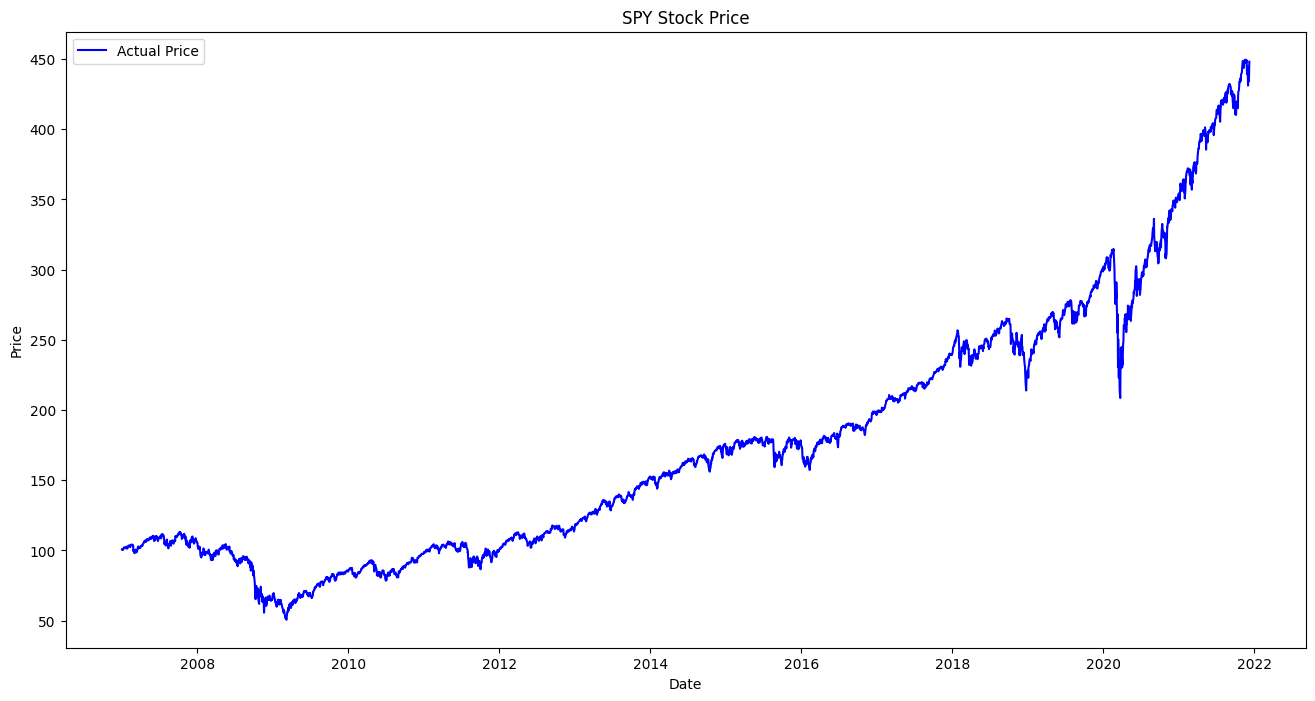

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(spy.index, spy['Adj Close'], color='blue', label='Actual Price')
plt.title('SPY Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Make predictions for all data points
all_predictions = []
for i in range(60, len(scaled_data)):
    X_pred = scaled_data[i-60:i].reshape(1, 60, 1)
    pred = model.predict(X_pred, verbose=0)
    all_predictions.append(scaler.inverse_transform(pred)[0,0])

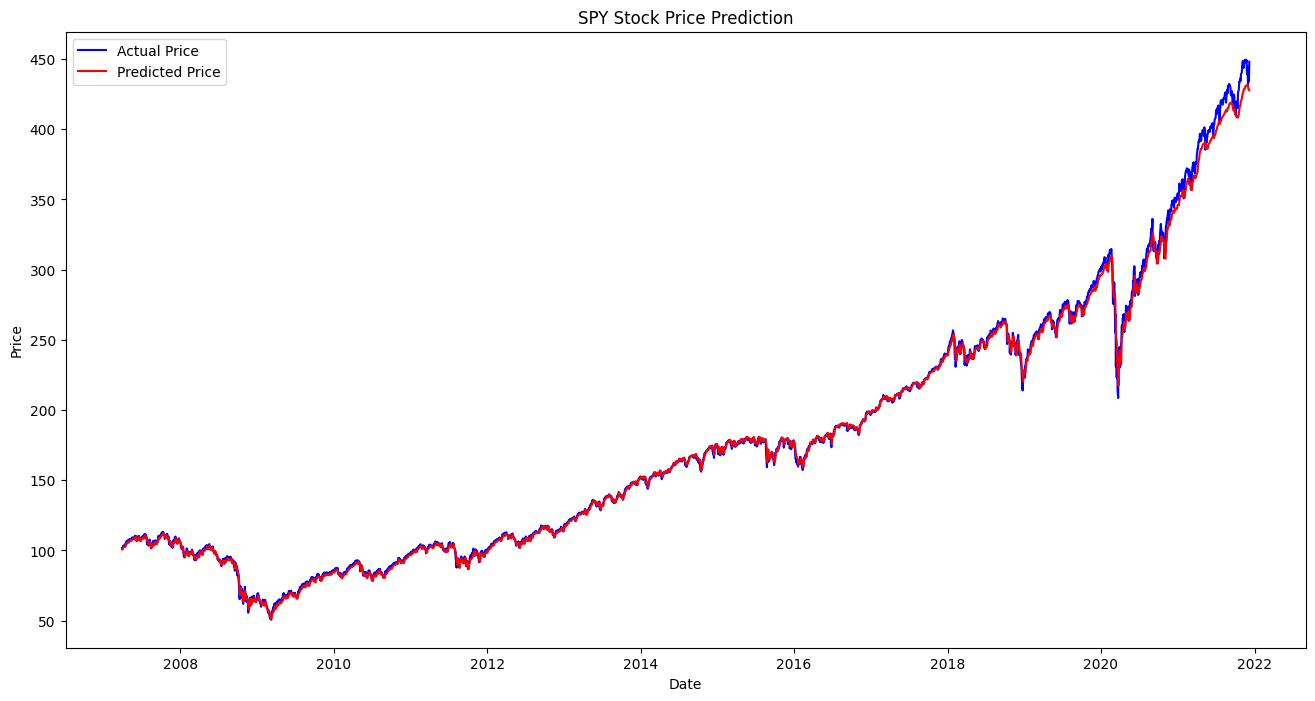

In [ ]:
# Plot predictions vs actual
plt.figure(figsize=(16,8))
plt.plot(spy.index[60:], spy['Adj Close'][60:], color='blue', label='Actual Price')
plt.plot(spy.index[60:], all_predictions, color='red', label='Predicted Price')
plt.title('SPY Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(spy['Adj Close'][60:].values, all_predictions)
rmse = np.sqrt(mean_squared_error(spy['Adj Close'][60:].values, all_predictions))
mape = np.mean(np.abs((spy['Adj Close'][60:].values - all_predictions) / spy['Adj Close'][60:].values)) * 100

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

Mean Absolute Error: $2.39
Root Mean Squared Error: $3.93
Mean Absolute Percentage Error: 1.30%


# **With validation data and early stopping**

In [ ]:
# Load all data
spy = yf.download('SPY', start='2007-01-01', end='2021-12-08')

# Scale
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(spy['Adj Close'].values.reshape(-1,1))

# Data prep for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to fit the LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(
    X, y,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

# Predict price
last_60_days = scaled_data[-60:]
X_pred = np.array([last_60_days])
X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))

next_day_scaled = model.predict(X_pred)
next_day_price = scaler.inverse_transform(next_day_scaled)

print(f"Predicted closing price for Dec 8, 2021: ${next_day_price[0][0]:.2f}")

# Get the actual price for that day
actual_price = yf.download('SPY', start='2021-12-08', end='2021-12-09')['Adj Close'][0]
print(f"Actual closing price for Dec 8, 2021: ${actual_price:.2f}")

# Calculate difference
diff = actual_price - next_day_price[0][0]
print(f"Difference: ${diff:.2f}")

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 26s 138ms/step - loss: 0.0103 - val_loss: 0.0018
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - loss: 7.2186e-04 - val_loss: 0.0027
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - loss: 7.2115e-04 - val_loss: 0.0034
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 6.7214e-04 - val_loss: 0.0026
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - loss: 6.5798e-04 - val_loss: 0.0017
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 6.1443e-04 - val_loss: 0.0047
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - loss: 5.3811e-04 - val_loss: 0.0030
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - loss: 5.2133e-04 - val_loss: 0.0070
Epoch 9/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - loss: 5.2239e-04 - val_loss: 0.0044
Epoch 10/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - loss: 4.5531e-04 - val_loss: 0.0042
Epoch 11/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 4.2820e-04 - val_los

[*********************100%***********************]  1 of 1 completed

Predicted closing price for Dec 8, 2021: $422.67
Actual closing price for Dec 8, 2021: $449.28
Difference: $26.60



<ipython-input-39-cc0aaf46bc54>:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  actual_price = yf.download('SPY', start='2021-12-08', end='2021-12-09')['Adj Close'][0]
